In [15]:
#lets import the nltk library 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
#! pip3 install wordcloud

In [17]:
#! pip install pyspellchecker

In [18]:
#lets import all the required libraries for the project 
%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pickle

from spellchecker import SpellChecker

In [19]:
#lets read the csv file and get it to dataframe
re_df = pd.read_csv('sample30.csv')

In [20]:
#lets check the top elements of our dataset
re_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [21]:
#lets check the shape of our dataset
re_df.shape

(30000, 15)

In [22]:
#lets get the columns of our dataset
re_df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [23]:
#lets get the detail of our dataset
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
id                      30000 non-null object
brand                   30000 non-null object
categories              30000 non-null object
manufacturer            29859 non-null object
name                    30000 non-null object
reviews_date            29954 non-null object
reviews_didPurchase     15932 non-null object
reviews_doRecommend     27430 non-null object
reviews_rating          30000 non-null int64
reviews_text            30000 non-null object
reviews_title           29810 non-null object
reviews_userCity        1929 non-null object
reviews_userProvince    170 non-null object
reviews_username        29937 non-null object
user_sentiment          29999 non-null object
dtypes: int64(1), object(14)
memory usage: 3.4+ MB


In [24]:
#lets get the number of unique value in every column
re_df.nunique()

id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64

In [25]:
#lets get the number of null values in every column
re_df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [26]:
#now lets remove duplicate if any user has done multiple review for same product
re_df.drop_duplicates(subset=['reviews_username','id','reviews_date'], inplace=True)

In [27]:
#lets check the shape of the new dataset
re_df.shape

(29841, 15)

In [28]:
#lets create new column counter same as index
re_df['counter'] = re_df.index

In [29]:
#lets check the top elements of the data
re_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,counter
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,0
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,3
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,4
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,NaN,NaN,samantha,Negative,5


In [30]:
#now lets check the grouped data as per ratings
data_ratings = re_df.groupby(['reviews_rating']).agg({'counter':'count'})

In [31]:
data_ratings

,counter
reviews_rating,
1,1381
2,419
3,1339
4,6001
5,20701


In [32]:
#lets drop the uneccesary columns
re_df.drop(['id','brand','name','categories','manufacturer','reviews_date','reviews_didPurchase','reviews_doRecommend','reviews_userCity','reviews_userProvince','reviews_username','counter'], axis=1, inplace=True)

In [33]:
#lets fill the na values of titlke with epty string
re_df['reviews_title'] = re_df.reviews_title.fillna('')

In [34]:
#lets create a new column with title and review
re_df['combined_reviews'] = re_df['reviews_title'] + re_df['reviews_text']

In [35]:
#now lets drop the old review and title column
re_df.drop(['reviews_text','reviews_title'], axis=1, inplace=True)

In [36]:
re_df.head()

,reviews_rating,user_sentiment,combined_reviews
0,5,Positive,Just Awesomei love this album. it's very good....
1,5,Positive,GoodGood flavor. This review was collected as ...
3,1,Negative,DisappointedI read through the reviews on here...
4,1,Negative,IrritationMy husband bought this gel for us. T...
5,1,Negative,Not worth itMy boyfriend and I bought this to ...


In [37]:
#lets remove the punctuation from review text
import string
def remove_punct(review):
    remover = str.maketrans('', '', string.punctuation)
    return review.translate(remover)

In [38]:
#lets apply the function over the review data
re_df['combined_reviews'] =  re_df['combined_reviews'].apply(remove_punct)

In [39]:
re_df.head()

,reviews_rating,user_sentiment,combined_reviews
0,5,Positive,Just Awesomei love this album its very good mo...
1,5,Positive,GoodGood flavor This review was collected as p...
3,1,Negative,DisappointedI read through the reviews on here...
4,1,Negative,IrritationMy husband bought this gel for us Th...
5,1,Negative,Not worth itMy boyfriend and I bought this to ...


In [40]:
#now lets create a function to remove the stopwords
from collections import Counter

def stopwords_remove(review):
    words = review.split()
    stop = stopwords.words("english")
    stopwords_dict = Counter(stop)
    review = " ".join([word for word in words if word not in stopwords_dict])
    return review

In [41]:
#now lets apply the stop word removal function on the reviews
re_df['combined_reviews'] =  re_df['combined_reviews'].apply(stopwords_remove)

In [42]:
re_df.head()

,reviews_rating,user_sentiment,combined_reviews
0,5,Positive,Just Awesomei love album good hip hop side cur...
1,5,Positive,GoodGood flavor This review collected part pro...
3,1,Negative,DisappointedI read reviews looking buying one ...
4,1,Negative,IrritationMy husband bought gel us The gel cau...
5,1,Negative,Not worth itMy boyfriend I bought spice things...


In [43]:
#now lets remove the url data from the url
import re

def remove_url(review):
    review = re.sub(r"http\S+", "", review)
    return review

In [44]:
re_df['combined_reviews'] =  re_df['combined_reviews'].apply(remove_url)

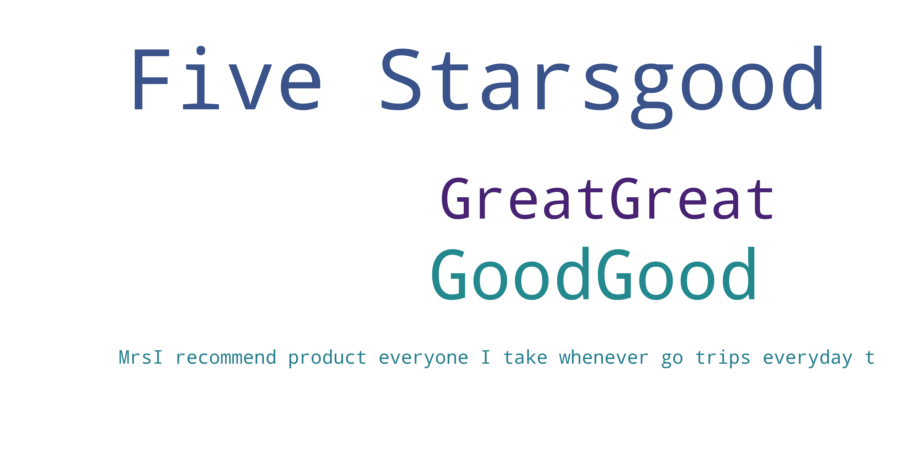

In [45]:
#now lets create woprd cloud the review data
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stop = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stop, max_words=400, max_font_size=
                     40, scale=30, random_state=1).generate_from_frequencies((re_df['combined_reviews'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
#now lets remove the word with single character from the review data
from nltk.tokenize import word_tokenize

def remove_one_length_char(review):
    token_words = word_tokenize(review)
    correct_words = []
    for word in token_words:
        if len(word)>1:
            correct_words.append(word)
    return " ".join(correct_words)

In [48]:
#noe lets apply this function on the review data
re_df['combined_reviews'] =  re_df['combined_reviews'].apply(remove_one_length_char)

In [49]:
#noe lets apply lemmetization on the review data
def lemmetization(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word.lower()) for word in review.split()]) for review in corpus]

In [50]:
re_df['combined_reviews'] =  lemmetization(re_df['combined_reviews'])

In [51]:
re_df.head()

,reviews_rating,user_sentiment,combined_reviews
0,5,Positive,just awesomei love album good hip hop side cur...
1,5,Positive,goodgood flavor this review collected part pro...
3,1,Negative,disappointedi read review looking buying one c...
4,1,Negative,irritationmy husband bought gel u the gel caus...
5,1,Negative,not worth itmy boyfriend bought spice thing be...


In [52]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29841 entries, 0 to 29999
Data columns (total 3 columns):
reviews_rating      29841 non-null int64
user_sentiment      29840 non-null object
combined_reviews    29841 non-null object
dtypes: int64(1), object(2)
memory usage: 932.5+ KB


In [53]:
#now lets check the row where sentiment is empty
re_df[re_df['user_sentiment'].isna()]

,reviews_rating,user_sentiment,combined_reviews
28354,5,NaN,super hit child loved itmy kid absolutely love...


In [54]:
#now lets fill the empty sentiments with postivie
re_df['user_sentiment'] = re_df['user_sentiment'].fillna('Positive')

In [55]:
re_df[re_df['user_sentiment'].isna()]

,reviews_rating,user_sentiment,combined_reviews


In [56]:
re_df.head()

,reviews_rating,user_sentiment,combined_reviews
0,5,Positive,just awesomei love album good hip hop side cur...
1,5,Positive,goodgood flavor this review collected part pro...
3,1,Negative,disappointedi read review looking buying one c...
4,1,Negative,irritationmy husband bought gel u the gel caus...
5,1,Negative,not worth itmy boyfriend bought spice thing be...


In [57]:
#now lets save this cleaned data as pkl file for further purpose
pickle.dump(re_df, open('clean_data.pkl', 'wb'))

In [58]:
#lets create the tfidf vector
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_vectorizer.fit(re_df['combined_reviews'])
X = tfidf_vectorizer.transform(re_df['combined_reviews'])
y = re_df['user_sentiment']

# Saving the vocabulary used in tfidf vectorizer as features
pickle.dump(tfidf_vectorizer.vocabulary_, open("features.pkl","wb"))

# Split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [59]:
#now lets check the sentiment on grouped data
re_df.groupby(['user_sentiment']).count()

,reviews_rating,combined_reviews
user_sentiment,,
Negative,3352,3352
Positive,26489,26489


In [60]:
#! pip3 install imblearn

In [62]:
#! pip install delayed

In [63]:
#since there is so much imbalaning in our data so lets balance the data using SMOTE
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Before", counter)

#now lets balance the oversampoling  using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print("After", counter)

Before Counter({'Positive': 19844, 'Negative': 2536})
After Counter({'Positive': 19844, 'Negative': 19844})


In [65]:
#lets create a function for showiung the model summary, accuracy, sentivity and specificity
def show_model_results(classifier):
    cmatrix = confusion_matrix(y_test, classifier.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classifier.classes_)
    disp.plot() 
    print(classifier)
    print('\n')
    print('Accuracy for our model is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity for our model is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity  for our model is {}'.format(cm[0][0]/sum(cm[0])))

In [66]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train_sm, y_train_sm)
    cm = confusion_matrix(y_test, lr.predict(X_test))
    print('Sensitivity for C = {0} is {1}'.format(c, cm[1][1]/sum(cm[1])))
    print('Specificity for C = {0} is {1}'.format(c, cm[0][0]/sum(cm[0])))

Sensitivity for C = 0.01 is 0.854627539503386
Specificity for C = 0.01 is 0.6727941176470589
Sensitivity for C = 0.05 is 0.8598946576373213
Specificity for C = 0.05 is 0.7205882352941176
Sensitivity for C = 0.25 is 0.8988713318284425
Specificity for C = 0.25 is 0.6997549019607843
Sensitivity for C = 0.5 is 0.9205417607223476
Specificity for C = 0.5 is 0.6764705882352942
Sensitivity for C = 1 is 0.9375470278404816
Specificity for C = 1 is 0.6544117647058824


In [67]:
#lets create a logistic regression model
final_lr_model = LogisticRegression(C=0.05)
final_lr_model.fit(X_train_sm, y_train_sm)

LogisticRegression(C=0.05)

LogisticRegression(C=0.05)


Accuracy for our model is  0.8446588929097976
Sensitivity for our model is 0.9375470278404816
Specificity  for our model is 0.6544117647058824


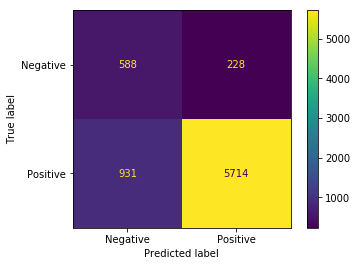

In [68]:
#Test data performance metrics score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

show_model_results(final_lr_model)

In [70]:
#now lets check the postive words and negative words
feature_to_coef = {
    word: coef for word, coef in zip(
     tfidf_vectorizer.get_feature_names(), final_lr_model.coef_[0])
}

print('Positive Words')
for best_positive in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1],
    reverse=True)[:10]:
    print(best_positive)
    
print('Negative Words')
for best_negative in sorted(
    feature_to_coef.items(),
    key=lambda x: x[1])[:10]:
    print(best_negative)

Positive Words
('great', 4.444414323111661)
('clean', 3.427703634403732)
('love', 2.8421345190293326)
('good', 2.831769040866128)
('easy', 2.7850019729599076)
('best', 1.9747319293850152)
('better', 1.5121766095639018)
('easy use', 1.4706335982747596)
('quick', 1.464000492243405)
('really', 1.3859497186436636)
Negative Words
('bad', -1.865572004567398)
('disappointed', -1.6701572604898114)
('evil', -1.558633855897569)
('like', -1.4745358724473123)
('resident evil', -1.394792998031972)
('resident', -1.3880655454741595)
('formula', -1.3665284285374741)
('horrible', -1.338401751519578)
('sick', -1.089997038141618)
('terrible', -1.0872607815983903)


In [71]:
#now lets create the naive bayes model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

nb_model=MultinomialNB()
nb_model.fit(X_train_sm, y_train_sm)

MultinomialNB()

MultinomialNB()


Accuracy for our model is  0.86436134566412
Sensitivity for our model is 0.9375470278404816
Specificity  for our model is 0.6544117647058824


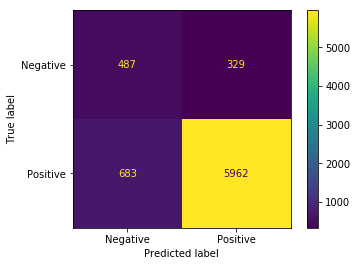

In [73]:
#now lets show the result
show_model_results(nb_model)

In [74]:
#lets import libraries for random classifier
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV

In [75]:
#now lets create random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

RandomForestClassifier()


Accuracy for our model is  0.9039002814636108
Sensitivity for our model is 0.9375470278404816
Specificity  for our model is 0.6544117647058824


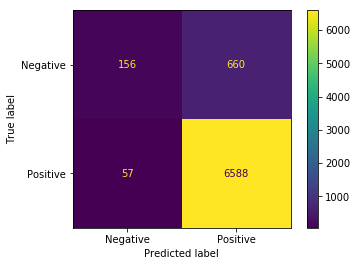

In [76]:
show_model_results(rf_model)

In [77]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,400],
    'n_estimators': [100, 300]
}

# Create a based model
final_rf = RandomForestClassifier()

# Instantiate the grid search model
rf_tuned = GridSearchCV(estimator = final_rf, param_grid = param_grid, scoring='roc_auc', cv = 3, n_jobs = -1,verbose = 1)
rf_tuned.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)

In [63]:
#since we have pour mopdel so lets print teh aoc values for that
print("Best AUC-ROC Score on train data: ", rf_tuned.best_score_)
print("Best hyperparameters: ", rf_tuned.best_params_)

Best AUC-ROC Score on train data:  0.8644378451158149
Best hyperparameters:  {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 400],
                         'n_estimators': [100, 300]},
             scoring='roc_auc', verbose=1)


Accuracy for our model is  0.830987803243533
Sensitivity for our model is 0.9375470278404816
Specificity  for our model is 0.6544117647058824


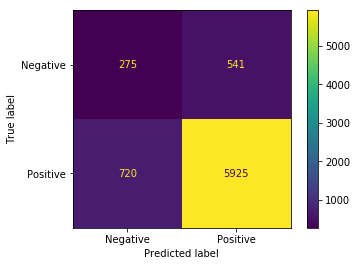

In [78]:
#now lets test data performance metrics for our model
show_model_results(rf_tuned)

In [91]:
# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

In [92]:
#now lets create the xgboost model for our data
final_xgb = XGBClassifier(booster='gbtree')
final_xgb.fit(X_train_sm, y_train_sm)

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy for our model is  0.8864763436536657
Sensitivity for our model is 0.9375470278404816
Specificity  for our model is 0.6544117647058824


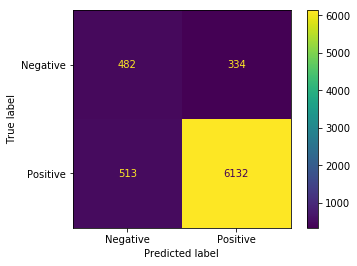

In [93]:
#now lets test our model for the metrics
show_model_results(final_xgb)

In [94]:
#now lets check the paramters for our modeland check the best values for that 
params = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[100, 300]}

final_xgb = XGBClassifier(booster='gbtree')

# set up GridSearchCV()
xgb_tuned = GridSearchCV(estimator = final_xgb, 
                        param_grid = rf_model, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)

xgb_tuned.fit(X_train_sm, y_train_sm)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'items'

In [89]:
# print best hyperparameters
print("Best AUC-ROC Score on train data: ", xgb_tuned.best_score_)
print("Best hyperparameters: ", xgb_tuned.best_params_)

NameError: name 'xgb_tuned' is not defined

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=N

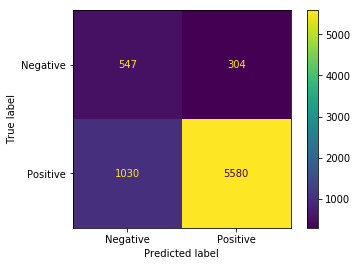

In [70]:
# Test data performance metrics
show_model_results(xgb_tuned)

In [95]:
results = {('LR'):[0.83, 0.85, 0.74], ('NB'):[0.86, 0.89, 60], ('XGB'):[0.90, 0.94, 0.59], ('XGB Tuned'):[0.85, 0.87, 0.64],
 ('RF'):[0.91, 0.99, 0.23], ('RF Tuned'):[0.81, 0.86, 0.36]}
pd.DataFrame(results, index=['Accuracy', 'Sensitivity', 'Specificity'])

,LR,NB,XGB,XGB Tuned,RF,RF Tuned
Accuracy,0.83,0.86,0.90,0.85,0.91,0.81
Sensitivity,0.85,0.89,0.94,0.87,0.99,0.86
Specificity,0.74,60.00,0.59,0.64,0.23,0.36


In [97]:
#now letc store the pickle file for our model which is linear refression
import pickle
# Save the best trained model as a pickle string.
saved_model = pickle.dump(final_lr_model, open('logistic_regression.pkl', 'wb'))

In [98]:
#now lets create the recommender system

In [73]:
#Recommender System

In [100]:
# now lets import the remianing libraries
from sklearn.metrics.pairwise import pairwise_distances

In [101]:
#now lets ahgaion get our dataset
review_df = pd.read_csv('sample30.csv')
review_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [102]:
#now lets cget only speicif columns which are impirtrant to us
review_df=review_df[['id', 'reviews_rating', 'reviews_username']]

In [103]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
id                  30000 non-null object
reviews_rating      30000 non-null int64
reviews_username    29937 non-null object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [104]:
review_df = review_df[~review_df.reviews_username.isna()]

In [105]:
#now lets get teh spefic columns 
review_df.columns=['productId', 'rating', 'user']
review_df.head()

,productId,rating,user
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557


In [107]:
#now lets do the train test split over our data 
train, test = train_test_split(review_df, test_size=0.30, random_state=31)#now lets 

In [109]:
#now lets check the size of our test and train dataset
print(train.shape)
print(test.shape)

(20955, 3)
(8982, 3)


In [110]:
#now lets form a pivot table from our data such thatgit can viewed on the basis of product id and users
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating',
    aggfunc='mean'
).fillna(0)

df_pivot.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#now lets create a copy the train dataset into dummy_train
dummy_train = train.copy()

In [112]:
dummy_train.head()

,productId,rating,user
5704,AVpf2tw1ilAPnD_xjflC,4,dwof
12549,AVpf3VOfilAPnD_xjpun,5,josie225
8534,AVpf3VOfilAPnD_xjpun,5,mellin1
5671,AVpf2tw1ilAPnD_xjflC,4,jerry64gd
21698,AVpfm8yiLJeJML43AYyu,1,augale


In [113]:
#now lets filter out data where rating is less tahn zero
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [114]:
# now lets convert this dummy train data into determinant
dummy_train = dummy_train.pivot_table(
    index='user',
    columns='productId',
    values='rating',
    aggfunc='mean'
).fillna(1)

In [115]:
dummy_train.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [116]:
#now lets check the number of unikque values into our piv oted data
df_pivot.index.nunique()

18212

In [117]:
#now lets create the  User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [118]:
#now lets check the shape of pairwise correlation matrix
user_correlation.shape

(18212, 18212)

In [119]:
#now lets create a user-product matrix.
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating',
    aggfunc='mean'
)
df_pivot.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
#now lets normalize the review rating of the product for every user around 0 mean 
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [121]:
#now lets check the niormlaized data
df_subtracted.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
#now lets create the user-similarity-matrix 
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
#mnow lets check yteh size of that matrix
user_correlation.shape

(18212, 18212)

In [124]:
#now lets do the user-user recommder system

In [125]:
#now hettiong that data where the icorrelation value is less than 0
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
#lets predict the ratings by the userand calculate the weighted sum of correlation with product rating 
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [127]:
#now lets check teh shape of the use predicted maytrix
user_predicted_ratings.shape

(18212, 255)

In [128]:
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 1.55829543, 3.20256308,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [129]:
#now lets fetch the final user ratings 
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.059436,0.0,0.0,0.0,0.915079,0.0,0.0,...,0.545545,0.0,0.0,0.0,0.0,0.0,0.0,1.558295,3.202563,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
06stidriver,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [131]:
#now lets evaluate the user-user inrteaction
frequent_users = test[test.user.isin(train.user)]
frequent_users.head()

,productId,rating,user
21169,AVpfm8yiLJeJML43AYyu,1,jjjj
8538,AVpf3VOfilAPnD_xjpun,5,jygibri
18735,AVpfJP1C1cnluZ0-e3Xy,4,jel08
22417,AVpfOmKwLJeJML435GM7,1,elena79
19297,AVpfJP1C1cnluZ0-e3Xy,5,angc


In [132]:
frequent_users.shape

(1976, 3)

In [133]:
#now lets create the pivot data 
common_users_pivot = common_users.reset_index().pivot_table(index='user',
    columns='productId',
    values='rating',
    aggfunc='mean')
common_users_pivot.head()

productId,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#now lets get the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
# set userid as index
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211
userId,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
frequent_users.head()

,productId,rating,user
21169,AVpfm8yiLJeJML43AYyu,1,jjjj
8538,AVpf3VOfilAPnD_xjpun,5,jygibri
18735,AVpfJP1C1cnluZ0-e3Xy,4,jel08
22417,AVpfOmKwLJeJML435GM7,1,elena79
19297,AVpfJP1C1cnluZ0-e3Xy,5,angc


In [137]:
#now lets convert our result into list
list_name = common_users.user.tolist()
user_correlation_df.columns = df_subtracted.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_1.shape

(1660, 18212)

In [138]:
#now lets the cirrelated maytrix
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head()

,1234,123charlie,37f5p,4cloroxl,50cal,7.87E+11,aac06002,abbey,abbi,abby,...,yesseniaw22,yeya,ygtz,yummy,zapman,zburt5,zebras,zippy,zitro,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
user_correlation_df_3.shape

(1660, 1660)

In [140]:
#now lets filter out the data where correlation is greater than 0
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_users_pivot.fillna(0))
common_user_predicted_ratings

array([[0.28867513, 0.        , 0.        , ..., 2.5423759 , 1.44337567,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [141]:
#now lets create the duimmy test data whcih is the copy of frequest users
dummy_test = frequent_users.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating', aggfunc = 'mean').fillna(0)

In [142]:
#now lets check the spahe of the dummy test data
dummy_test.shape

(1660, 127)

In [143]:
dummy_test.head()

productId,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#lets get the common users preducted 
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

productId,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1h6Gu0glJLPUi8IjA_,...,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
#now lets import the min max scalet and numpy funtion
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [147]:
#now lets do the data scalling
X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [148]:
common_ = common_users.pivot_table(index='user', columns='productId', values='rating', aggfunc = 'mean')

In [149]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [150]:
#so now we have RMSE valuefor user -user reciomneder
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.4124916499091618


In [142]:
#item item similarity

In [151]:
#now lets buld the item item based similatory crecomnmder system

In [152]:
#now lets gain create the pivot table
df_pivot = train.pivot_table(
    index='user',
    columns='productId',
    values='rating',
    aggfunc = 'mean'
).T

df_pivot.head()

user,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#now lets find the mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [154]:
#let create the subtract file
df_subtracted.head()

user,00sab00,01impala,02dakota,02deuce,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,...,zowie,zozo0o,zpalma,zsazsa,zt313,zuttle,zwithanx,zxcsdfd,zyiah4,zzz1127
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
#now lkets import ythe library
from sklearn.metrics.pairwise import pairwise_distances

In [156]:
#now lets create Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [157]:
item_correlation.shape

(255, 255)

In [158]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [159]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00600224, 0.06201728,
        0.        ],
       [0.        , 0.        , 0.01254045, ..., 0.00108461, 0.        ,
        0.        ],
       [0.        , 0.        , 0.02090075, ..., 0.00180769, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00644332],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00515466]])

In [160]:
item_predicted_ratings.shape

(18212, 255)

In [161]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

productId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.011345,0.001677,0.0,0.010336,0.0,0.0,0.033075,0.006002,0.062017,0.000000
01impala,0.0,0.0,0.012540,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.004564,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001085,0.000000,0.000000
02dakota,0.0,0.0,0.020901,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.007607,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001808,0.000000,0.000000
02deuce,0.0,0.0,0.016721,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.006085,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001446,0.000000,0.000000
06stidriver,0.0,0.0,0.000000,0.000454,0.0,0.0,0.0,0.001731,0.001915,0.000000,...,0.000000,0.000000,0.0,0.003187,0.0,0.0,0.000000,0.000000,0.000000,0.006443


In [162]:
#now lets evaluate our item item recommder

In [163]:
test.columns

Index(['productId', 'rating', 'user'], dtype='object')

In [164]:
common =  test[test.productId.isin(train.productId)]
common.shape

(8964, 3)

In [165]:
common.head()

,productId,rating,user
21384,AVpfm8yiLJeJML43AYyu,1,curlyd
14483,AVpf3VOfilAPnD_xjpun,5,prip
21169,AVpfm8yiLJeJML43AYyu,1,jjjj
25411,AVpfPaoqLJeJML435Xk9,5,internetfreak69
20351,AVpfJP1C1cnluZ0-e3Xy,5,hb6851


In [166]:
common_item_based_matrix = common.pivot_table(index='user', columns='productId', values='rating', aggfunc = 'mean').T

In [167]:
common_item_based_matrix.shape

(203, 8348)

In [168]:
item_correlation_df = pd.DataFrame(item_correlation)

In [169]:
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078102,0.0,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [170]:
item_correlation_df['productId'] = df_subtracted.index
item_correlation_df.set_index('productId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
productId,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013954,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078102,0.0,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [171]:
list_name = common.productId.tolist()

In [172]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [173]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [174]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
productId,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.013954,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003657,0.0,...,0.0,0.078102,0.0,0.0,0.0,0.0,0.0,0.001989,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [175]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02105944, 0.00045358, 0.00036287, ..., 0.00045358, 0.00018143,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00733409],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10336214],
       [0.        , 0.00644332, 0.00515466, ..., 0.00644332, 0.00257733,
        0.        ]])

In [176]:
common_item_predicted_ratings.shape

(203, 8348)

In [177]:
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='productId', values='rating', aggfunc = 'mean').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [178]:
common_ = common.pivot_table(index='user', columns='productId', values='rating', aggfunc = 'mean').T

In [179]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [180]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [181]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5762571957798124


In [182]:
#Since RMSE value of user-user recommendation model is less so we will use that

In [183]:
# Saving the data
pickle.dump(user_final_rating.astype('float32'), open('user_final_rating.pkl', 'wb'))

In [184]:
#recommebding the top 20 products

In [185]:
#lets take any of the user present inmouir data
user_input = "00sab00"

In [186]:
#get top 20 products
product_ids = pd.DataFrame(user_final_rating.loc[user_input].sort_values(ascending=False)[:20])
product_ids.head()

,00sab00
productId,
AVpfPaoqLJeJML435Xk9,59.497748
AVpfRTh1ilAPnD_xYic2,35.729246
AVpf0eb2LJeJML43EVSt,30.742364
AVpf2tw1ilAPnD_xjflC,14.335169
AVpf3VOfilAPnD_xjpun,13.632461


In [187]:
new_df =  pd.read_csv('sample30.csv')

In [188]:
#lets get the corresponding products
products = pd.DataFrame(new_df[['id','name']]).drop_duplicates()
products.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [189]:
#lets check the data type
print(type(product_ids))
print(type(products))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [195]:
#now mleytc check the products the top 20
product_range = pd.merge(product_ids,products,left_on='productId',right_on = 'id')
product_range['name'].head(20)

0     Godzilla 3d Includes Digital Copy Ultraviolet ...
1     Planes: Fire Rescue (2 Discs) (includes Digita...
2        The Resident Evil Collection 5 Discs (blu-Ray)
3                      Red (special Edition) (dvdvideo)
4     Clorox Disinfecting Wipes Value Pack Scented 1...
5     Coty Airspun Face Powder, Translucent Extra Co...
6                        Jason Aldean - They Don't Know
7     Windex Original Glass Cleaner Refill 67.6oz (2...
8                                 Alex Cross (dvdvideo)
9     Pendaflex174 Divide It Up File Folder, Multi S...
10    Lysol Concentrate Deodorizing Cleaner, Origina...
11                 Clorox Disinfecting Bathroom Cleaner
12                                     Equals (blu-Ray)
13      Bisquick Original Pancake And Baking Mix - 40oz
14       Tree Hut Shea Body Butters, Coconut Lime, 7 oz
15                   There's Something About Mary (dvd)
16    The Seaweed Bath Co. Argan Conditioner, Smooth...
17                  100:Complete First Season (b

In [196]:
#recommending top 5 products
product_range.columns

Index(['00sab00', 'id', 'name'], dtype='object')

In [197]:
new_df['combined_reviews'] = new_df['reviews_title'] + new_df['reviews_text']


In [198]:
product_review = pd.DataFrame(new_df[['id','combined_reviews','user_sentiment']]).drop_duplicates()
review_data = pd.merge(product_range, product_review, on = 'id')

In [199]:
#nowe lets get the combined data
review_data.head()

,00sab00,id,name,combined_reviews,user_sentiment
0,59.497748,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,awfulcould have left this one on the shelf but...,Positive
1,59.497748,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,Much worse than expectedThis movie is much wor...,Positive
2,59.497748,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,Just dont get the hypeJust don't get the hype ...,Negative
3,59.497748,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,Not the best itemA little disappointed its not...,Negative
4,59.497748,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,"Good movie, bad packaging.It was on sale, so I...",Negative
